In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso  
from sklearn import metrics

In [4]:
car_dataset = pd.read_csv('C:/Users/User/CarPrice-demo/car data.csv')



In [5]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_dataset.shape

(301, 9)

In [7]:
#getting info about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#Checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
# encoding "Fuel_type" column

car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG': 2}}, inplace=True)

#encoding "Seller_type" column

car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

# encoding "Transmission" column

car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
# Splitting the data and target

x = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [13]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
# splitting into training data and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=4)

In [15]:

# Model Training

lin_reg_model =  LinearRegression()

In [16]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [17]:
# Model Evaluation

# Prediction on training Data
training_data_prediction = lin_reg_model.predict(x_train)

In [18]:
# R squared data
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8770734873312224


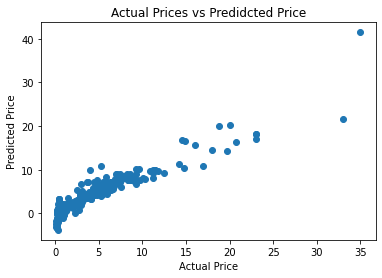

In [19]:

# Visualize the actual prices and predicted prices

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predidcted Price")
plt.show()

In [20]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)

In [21]:
# R squared data
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8877397539832125


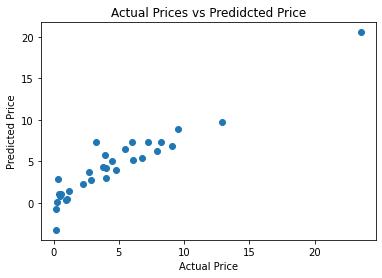

In [22]:
# Visualize the actual prices and predicted prices

plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predidcted Price")
plt.show()

In [23]:
# LAsso Regression



In [24]:
# Model Training

lass_reg_model =  Lasso()

In [25]:
lass_reg_model.fit(x_train, y_train)

Lasso()

In [26]:
# Model Evaluation

# Prediction on training Data
training_data_prediction = lass_reg_model.predict(x_train)

In [27]:
# R squared data
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8377945133803564


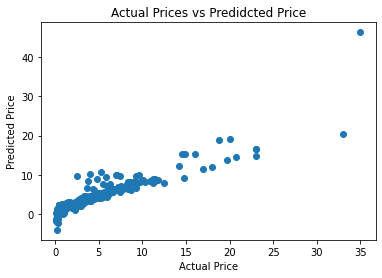

In [28]:
# Visualize the actual prices and predicted prices

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predidcted Price")
plt.show()

In [29]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(x_test)

In [30]:
# R squared data
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8924235526839414


In [31]:
# Visualize the actual prices and predicted prices

plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predidcted Price")
plt.show()